# Import

In [1]:
#First we import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set ()
import scipy
import scipy.stats
import statistics

In [2]:
import scipy.optimize
import matplotlib.lines
import math, matplotlib

In [3]:
#we load the data set
df = pd.read_csv("new-seismic-bumps.csv")

In [4]:
#We show the dataset
df

,magnitude,time
0,2000,1
1,3000,3
2,1000,6
3,4000,7
4,500,9
...,...,...
1115,90000,2554
1116,600,2555
1117,6000,2567
1118,1000,2569


In [5]:
#select threshold for min magnitude to be counted as event
m = 10000
df = df.loc[df['magnitude'] >= m]

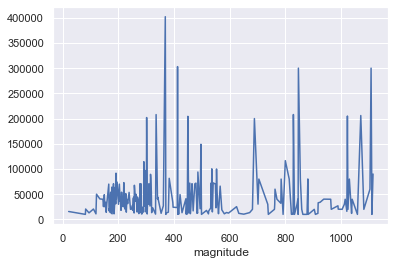

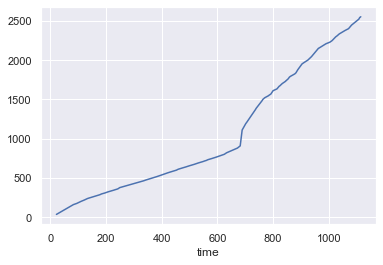

In [6]:
#we make a plot for every columns to visualize the data
for column in df.head():
    plt.plot(df[column])
    plt.xlabel(column)
    plt.show()

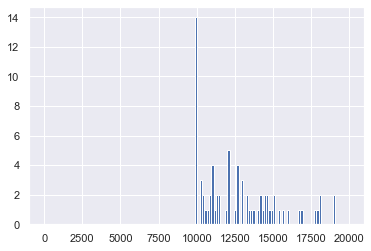

In [7]:
h=plt.hist(df["magnitude"], bins=np.arange(0,20000,150))
plt.show()

In [8]:
#vedo caratteristiche statistiche delle misure
from scipy.stats import skew
from scipy.stats import kurtosis

In [9]:
print(skew(df["magnitude"]))
print(kurtosis(df["magnitude"]))

3.4439438719943594
14.3501230067065


In [10]:
energy=df["magnitude"]-statistics.mean(df["magnitude"])

In [11]:
statistics.mean(df["magnitude"])

45045.17543859649

In [12]:
print(max(energy))

356954.8245614035


In [13]:
print(min(energy))

-35045.17543859649


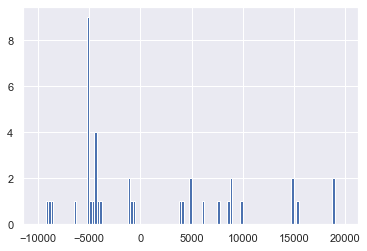

In [14]:
plt.hist(energy, bins=np.arange(-10000,20000,250))
plt.show()

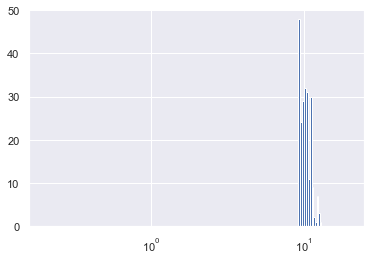

In [15]:
plt.hist(np.log(df["magnitude"]), bins=np.arange(-1,20,0.3))
plt.xscale("log")
plt.show()

In [16]:
df = df.to_numpy()

In [17]:
#select how long you want the data input from 0 to dfa[:, 0] (don't run this cell)
#dfa = dfa[:100]

In [18]:
df[:, 1]

array([  36,  160,  161,  176,  203,  216,  219,  239,  251,  254,  257,
        259,  263,  265,  267,  274,  275,  277,  278,  279,  280,  282,
        283,  284,  285,  286,  287,  296,  297,  298,  300,  302,  304,
        305,  306,  309,  316,  319,  323,  324,  326,  328,  330,  335,
        337,  340,  341,  342,  344,  346,  349,  351,  352,  354,  357,
        364,  377,  379,  380,  381,  384,  385,  386,  390,  392,  397,
        398,  401,  403,  404,  405,  406,  407,  410,  411,  412,  413,
        414,  415,  419,  420,  421,  422,  423,  425,  426,  428,  429,
        430,  431,  433,  434,  438,  439,  443,  445,  446,  448,  449,
        452,  453,  463,  465,  472,  473,  486,  494,  503,  505,  506,
        515,  518,  533,  535,  554,  555,  556,  557,  559,  566,  570,
        574,  590,  591,  594,  595,  597,  600,  608,  611,  613,  614,
        618,  622,  629,  633,  637,  638,  639,  640,  650,  653,  655,
        674,  683,  685,  692,  693,  695,  696,  6

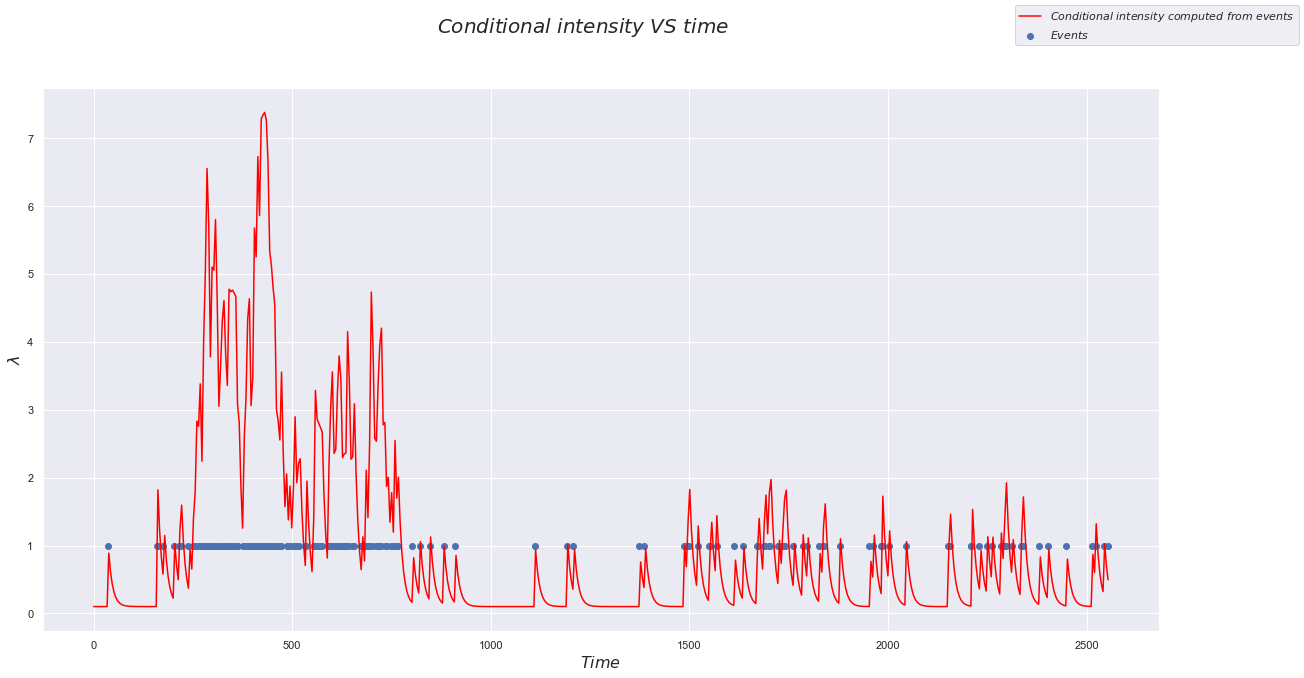

In [19]:
#mu = 0.07 # Parameter values as found in the article http://jheusser.github.io/2013/09/08/hawkes.html Hawkes Process section.
#alpha = 1.18
#beta = 1.79

mu = 0.1 
alpha = 1.0
beta = 0.1

EventTimes = df[:, 1]

" Compute conditional intensities for all times using the Hawkes process. "
timesOfInterest = np.linspace(0.0, df[-1,1], 600) # Times where the intensity will be sampled.
conditionalIntensities = [] # Conditional intensity for every epoch of interest.
for t in timesOfInterest:
     conditionalIntensities.append( mu + np.array( [alpha*math.exp(-beta*(t-ti)) if t > ti else 0.0 for ti in EventTimes] ).sum() ) # Find the contributions of all preceding events to the overall chance of another one occurring. All events that occur after t have no contribution.

" Plot the conditional intensity time history. "
fig = plt.figure(figsize=(20,10))
ax = fig.gca()

labelsFontSize = 16
ticksFontSize = 14

fig.suptitle(r"$Conditional\ intensity\ VS\ time$", fontsize=20)
ax.grid(True)
ax.set_xlabel(r'$Time$',fontsize=labelsFontSize)
ax.set_ylabel(r'$\lambda$',fontsize=labelsFontSize)
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

eventsScatter = ax.scatter(EventTimes,np.ones(len(EventTimes))) # Just to indicate where the events took place.

ax.plot(timesOfInterest, conditionalIntensities, color='red', linestyle='solid', marker=None, markerfacecolor='blue', markersize=12)
fittedPlot = matplotlib.lines.Line2D([],[],color='red', linestyle='solid', marker=None,  markerfacecolor='blue', markersize=12)

fig.legend([fittedPlot, eventsScatter], [r'$Conditional\ intensity\ computed\ from\    events$', r'$Events$'])
plt.show()

bisogna scoprire come 

In [20]:
" Find a fit for alpha, beta, and mu that minimises loglikelihood for the input data. "
def loglikelihood(x, *args):
    for x in timesOfInterest:
        return mu + np.array( [alpha*math.exp(-beta*(x-ti)) if x > ti else 0.0 for ti in EventTimes] ).sum()


res = scipy.optimize.minimize(loglikelihood, (1, 0.2,0.1), method='Nelder-Mead', args = (mu, alpha, beta))
(mu, alpha, beta) =  res.x

In [21]:
print(res.x)

[1.  0.2 0.1]
